In [2]:
# Get or import some libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [3]:
im_path = "Le_Chef_Receipt____20180521103247___.jpeg"

img = cv2.imread(im_path)

In [4]:
print(img.shape)

(2982, 1886, 3)


In [5]:
# Image resize
img = cv2.resize(img,(1500,800))
print(img.shape)

(800, 1500, 3)


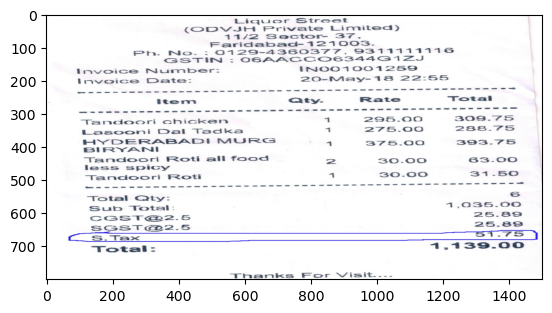

In [6]:
plt.imshow(img)

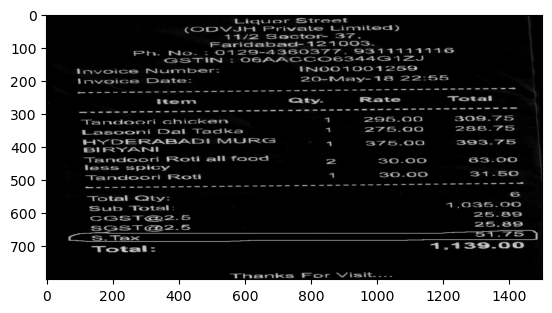

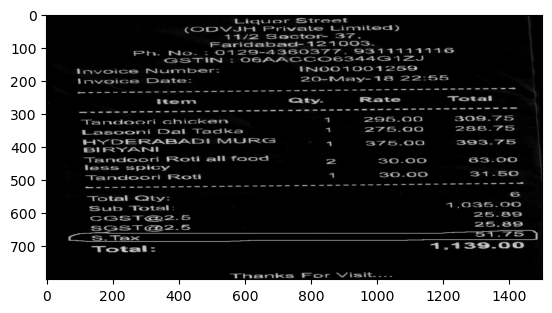

In [55]:
# Removing the noise and blur
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "binary")
plt.show()
blurred = cv2.GaussianBlur(gray, (1,1),0)
plt.imshow(blurred, cmap = "binary")
plt.show()

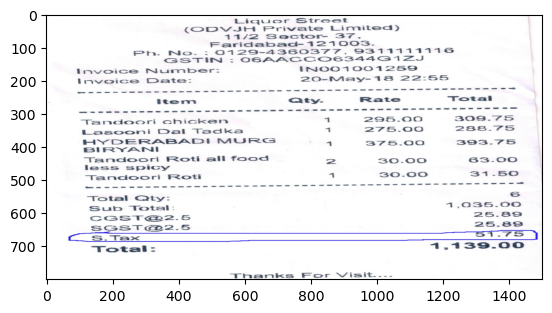

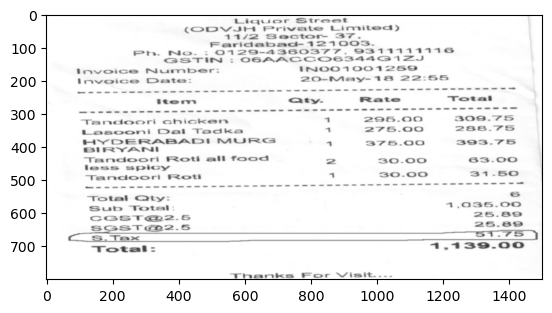

In [8]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()

In [9]:
regen.shape

(800, 1500, 3)

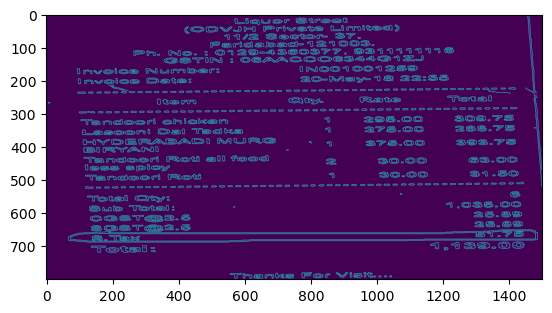

In [10]:
# Edge Detection
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()
plt.imshow(orig_edge)
plt.show()

In [11]:
# contour extraction
contour, _ =cv2.findContours(edge, cv2.RETR_LIST , cv2.CHAIN_APPROX_NONE)

In [21]:
print(len(contour))

contours = sorted(contour, reverse = True, key = cv2.contourArea)

1615


In [23]:
for c in contours:
    p = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    if len(approx) == 4 :
        target = approx
        break
print(target.shape)

(4, 1, 2)


In [25]:
# reorder target contour
def reorder(h):
    h = h.reshape((4,2))
    print(h)
    hnew = np.zeros((4,2) , dtype = np.float32)
    add = h.sum(axis = 1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    diff = np.diff(h, axis=1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    return hnew

In [27]:
reorders = reorder(target)
print("*****")
print(reorders)

[[648 517]
 [648 520]
 [664 520]
 [664 517]]
*****
[[648. 520.]
 [664. 520.]
 [648. 520.]
 [664. 520.]]


In [29]:
input_rep = reorders
op_map = np.float32([[0,0],[800,0],[800,800],[0,800]])
M = cv2.getPerspectiveTransform(input_rep,op_map)

ans = cv2.warpPerspective(orig, M , (800,800))

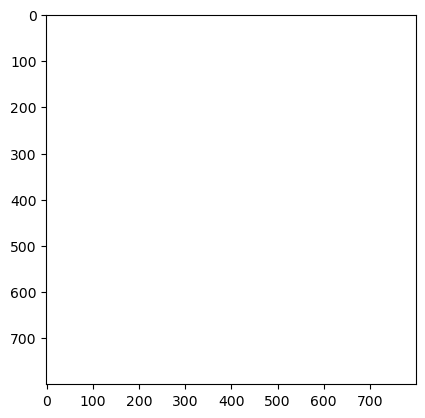

In [35]:
plt.imshow(ans)
# plt.title("Edge Detection")
plt.show()

In [ ]:
res = cv2.cvtColor(ans , cv2.COLOR_BGR2GRAY)
